In [1]:
# Librerías
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Input, Conv2D, MaxPooling2D, Layer
from keras.optimizers import RMSprop, SGD, Adam
from keras import regularizers
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.regularizers import l2,l1

In [2]:
# Dimensiones de las imágenes
image_w = 150
image_h = 150
input_shape = (image_w, image_h, 3)

In [3]:
r = 0.2125
g = 0.7174
b = 0.0721

'''
Se define una capa personalizada
Es necesario mantener las 3 dimensiones de las imágenes
'''
class RGB_a_BN(Layer):
    def call(self, inputs):
        gris = r * inputs[:, :, :, 0] + g * inputs[:, :, :, 1] + b * inputs[:, :, :, 2] # Se pasa de 3D a 2D (ancho, alto)
        return tf.expand_dims(gris, axis = -1)  # Añade una dimensión para no perder las 3D (ancho, alto, color) al final (-1)

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [5]:
# Directorio
i_dir = '/kaggle/input/gato-test/cat10000.jpg'

In [6]:
# Es necesario transformarla a un array de numpy
i_test = Image.open(i_dir)
i_resize = i_test.resize((image_w, image_h))    # Se redimensiona por si es necesario (para meter cualquier imagen)
i_array = np.array(i_resize)

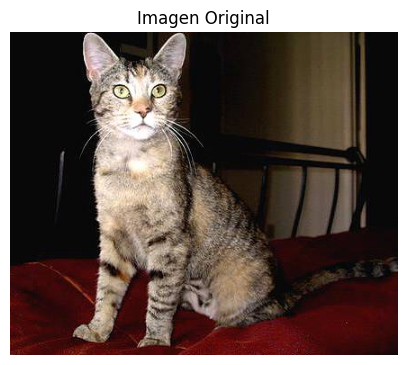

In [7]:
# Imagen original
plt.figure(figsize=(5, 5))  # Reducir el tamaño de la figura
plt.title("Imagen Original")
plt.imshow(i_test)
plt.axis('off')
plt.show()

In [8]:
model = Sequential()
model.add(RGB_a_BN(input_shape = input_shape))

'''
model.predict toma los argumentos (batch_size, height, weight, channels)
Agraga 1 dimensión al inicio para 'simular que hay batchs' de tamaño 1 imagen
'''
i_nueva = model.predict(np.expand_dims(i_array, axis = 0))

1/1 [==============================] - 0s 179ms/step


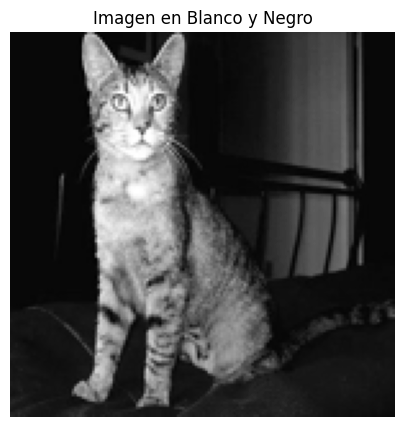

In [9]:
# Imagen en blanco y negro
plt.figure(figsize=(5, 5))  # Reducir el tamaño de la figura
plt.title("Imagen en Blanco y Negro")
plt.imshow(i_nueva[0, :, :, 0], cmap = 'gray') # Toma la imagen de índice 0 del batch (tamaño 1) y el canal de índice 0 (único canal)
plt.axis('off')
plt.show()